In [1]:
import requests
import zipfile
import io
import time
import os
import pandas as pd

In [2]:
def downloadData():
    years = ['2019', '2020', '2021', '2022', '2023']
    months = [str(x).zfill(2) for x in range(1, 13)]

    for y in years:
        download_folder = './download/'
        for m in months:
            time.sleep(0.3)
            date = y + m
            # URL of the zip file
            #file_url = f"https://climatologia.meteochile.gob.cl/application/datos/getDatosEma/360011/360011_{date}_Viento.csv.zip"
            file_url = f"https://climatologia.meteochile.gob.cl/application/datos/getDatosEma/360011/360011_{date}_AguaCaida.csv.zip"

            # Ensure the download folder exists, create if not
            os.makedirs(download_folder, exist_ok=True)

            # Extract the file name from the URL
            file_name = file_url.split("/")[-1]

            # Construct the full path to save the file
            file_path = os.path.join(download_folder, file_name)

            # Send a GET request to download the file
            response = requests.get(file_url)

            # Check if the request was successful
            if response.status_code == 200:
                with open(file_path, 'wb') as f:
                    f.write(response.content)
                print(f"File downloaded and saved as {file_path}")
            else:
                print(f"Failed to download the file. Status code: {response.status_code}")
#downloadData()

File downloaded and saved as ./download/360011_201901_AguaCaida.csv.zip
File downloaded and saved as ./download/360011_201902_AguaCaida.csv.zip
File downloaded and saved as ./download/360011_201903_AguaCaida.csv.zip
File downloaded and saved as ./download/360011_201904_AguaCaida.csv.zip
File downloaded and saved as ./download/360011_201905_AguaCaida.csv.zip
File downloaded and saved as ./download/360011_201906_AguaCaida.csv.zip
File downloaded and saved as ./download/360011_201907_AguaCaida.csv.zip
File downloaded and saved as ./download/360011_201908_AguaCaida.csv.zip
File downloaded and saved as ./download/360011_201909_AguaCaida.csv.zip
File downloaded and saved as ./download/360011_201910_AguaCaida.csv.zip
File downloaded and saved as ./download/360011_201911_AguaCaida.csv.zip
File downloaded and saved as ./download/360011_201912_AguaCaida.csv.zip
File downloaded and saved as ./download/360011_202001_AguaCaida.csv.zip
File downloaded and saved as ./download/360011_202002_AguaCaida.

In [3]:
def unzipData():
    # Paths to the download and data folders
    download_folder = "./download/"
    data_folder = "./data/"

    # Ensure the data folder exists, create if not
    os.makedirs(data_folder, exist_ok=True)

    # List all files in the download folder
    download_files = os.listdir(download_folder)

    # Loop through each file in the download folder
    for file_name in download_files:
        # Construct the full paths for the input and output files
        input_file_path = os.path.join(download_folder, file_name)
        output_folder_path = data_folder

        # Check if the file is a zip file
        if file_name.endswith(".zip"):
            try:
                # Open and extract the zip file
                with zipfile.ZipFile(input_file_path, 'r') as zip_ref:
                    # Extract all contents to the output folder
                    zip_ref.extractall(output_folder_path)
                print(f"Extracted {file_name} to {output_folder_path}")
            except zipfile.BadZipFile:
                print(f"{file_name} is not a valid zip file.")
        else:
            print(f"{file_name} is not a zip file.")

    print("Extraction process completed.")
#unzipData()

360011_201901_AguaCaida.csv.zip is not a valid zip file.
Extracted 360011_201902_AguaCaida.csv.zip to ./data/
Extracted 360011_201903_AguaCaida.csv.zip to ./data/
Extracted 360011_201904_AguaCaida.csv.zip to ./data/
Extracted 360011_201905_AguaCaida.csv.zip to ./data/
Extracted 360011_201906_AguaCaida.csv.zip to ./data/
Extracted 360011_201907_AguaCaida.csv.zip to ./data/
Extracted 360011_201908_AguaCaida.csv.zip to ./data/
Extracted 360011_201909_AguaCaida.csv.zip to ./data/
Extracted 360011_201910_AguaCaida.csv.zip to ./data/
Extracted 360011_201911_AguaCaida.csv.zip to ./data/
Extracted 360011_201912_AguaCaida.csv.zip to ./data/
Extracted 360011_202001_AguaCaida.csv.zip to ./data/
Extracted 360011_202002_AguaCaida.csv.zip to ./data/
Extracted 360011_202003_AguaCaida.csv.zip to ./data/
Extracted 360011_202004_AguaCaida.csv.zip to ./data/
Extracted 360011_202005_AguaCaida.csv.zip to ./data/
Extracted 360011_202006_AguaCaida.csv.zip to ./data/
Extracted 360011_202007_AguaCaida.csv.zip 

In [4]:
csv_folder = "./data/"

csv_files = [file for file in os.listdir(csv_folder) if file.endswith('.csv')]

dataframes = []

for csv_file in csv_files:
    csv_path = os.path.join(csv_folder, csv_file)
    df = pd.read_csv(csv_path, delimiter=';')
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128546 entries, 0 to 2128545
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   codigoNacional   int64  
 1   idEquipo         int64  
 2   idPista          float64
 3   momento          object 
 4   rrInst           float64
 5   rr1Hora          float64
 6   rr3Horas         float64
 7   rr6Horas         float64
 8   rr12Horas        float64
 9   rr24Horas        float64
 10  momentoRegistro  object 
 11  rrTotalAnual     float64
 12  rr15m            float64
 13  nieveAcumulada   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 227.4+ MB


In [6]:
combined_df.isnull().sum()

codigoNacional           0
idEquipo                 0
idPista            2128546
momento                  0
rrInst                   0
rr1Hora                 12
rr3Horas                12
rr6Horas                12
rr12Horas               12
rr24Horas               12
momentoRegistro          0
rrTotalAnual       2128546
rr15m              2128546
nieveAcumulada     2128546
dtype: int64

<Axes: >

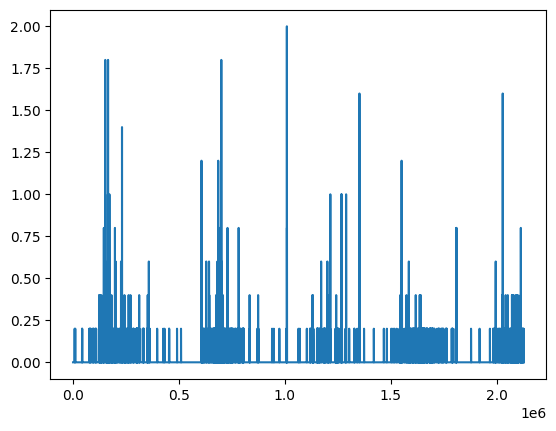

In [13]:
combined_df['rrInst'].plot()

In [7]:
result_df = combined_df[combined_df.columns[combined_df.isnull().sum() == 0]]
result_df = result_df.drop(columns='momentoRegistro')
result_df

,codigoNacional,idEquipo,momento,rrInst
0,360011,0,2019-02-05 18:27:00,0.0
1,360011,0,2019-02-05 18:28:00,0.0
2,360011,0,2019-02-05 18:29:00,0.0
3,360011,0,2019-02-05 18:30:00,0.0
4,360011,0,2019-02-05 18:31:00,0.0
...,...,...,...,...
2128541,360011,0,2023-07-31 23:56:00,0.0
2128542,360011,0,2023-07-31 23:57:00,0.0
2128543,360011,0,2023-07-31 23:58:00,0.0
2128544,360011,0,2023-07-31 23:59:00,0.0


In [14]:
result_df.info(), result_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128546 entries, 0 to 2128545
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   codigoNacional  int64  
 1   idEquipo        int64  
 2   momento         object 
 3   rrInst          float64
dtypes: float64(1), int64(2), object(1)
memory usage: 65.0+ MB


(None,
 codigoNacional    0
 idEquipo          0
 momento           0
 rrInst            0
 dtype: int64)

In [17]:
result_df = result_df.drop(columns=['idEquipo', 'codigoNacional'])
result_df.columns

Index(['momento', 'rrInst'], dtype='object')

In [18]:
result_df.to_csv('./dataset/lluvia_dataset.csv', sep=';', index=False)

In [21]:
df_viento = pd.read_csv('./dataset/viento_dataset.csv', delimiter=';')

In [23]:
df_viento = df_viento.drop(columns=['codigoNacional', 'idEquipo', 'dd02Minutos', 'dd10Minutos', 'ff02Minutos', 'ff10Minutos'])

In [24]:
df_viento

,momento,ddInst,ffInst
0,2019-02-05 18:27:00,218.0,9.7
1,2019-02-05 18:28:00,208.0,8.0
2,2019-02-05 18:29:00,230.0,6.2
3,2019-02-05 18:30:00,213.0,6.8
4,2019-02-05 18:31:00,232.0,9.3
...,...,...,...
2150608,2023-07-31 23:56:00,28.0,4.7
2150609,2023-07-31 23:57:00,28.0,4.9
2150610,2023-07-31 23:58:00,34.0,5.2
2150611,2023-07-31 23:59:00,32.0,5.4


In [25]:
df_viento.to_csv('./dataset/viento_dataset.csv', sep=';', index=False)